In [3]:
# mnist 데이터를 가지고 딥러닝 진행해보기

In [11]:
import tensorflow as tf
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np

mnist = tf.keras.datasets.mnist

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)


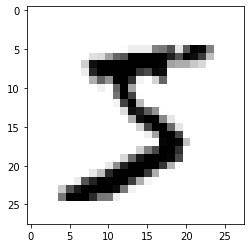

In [12]:
(xtr, ytr), (xte, yte) = mnist.load_data()

print(xtr.shape, ytr.shape, xte.shape, yte.shape, sep = "\n\n")

pl.imshow(xtr[0], cmap = pl.cm.binary)
pl.show()

In [6]:
# DNN ( 심층 신경망 ) 모델

In [7]:
xtr = xtr/255
xte = xte/255

md = tf.keras.models.Sequential([
    
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(128, activation = "relu"),
  tf.keras.layers.Dense(64, activation = "relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation = "softmax")

])

md.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [8]:
md.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ["accuracy"])

In [9]:
hstr = md.fit(xtr, ytr, epochs = 6, validation_split= 0.2)
md.evaluate(xte, yte, verbose = 2)

Epoch 1/6
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3144 - accuracy: 0.9075 - val_loss: 0.1408 - val_accuracy: 0.9597
Epoch 2/6
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1377 - accuracy: 0.9590 - val_loss: 0.1128 - val_accuracy: 0.9658
Epoch 3/6
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0997 - accuracy: 0.9695 - val_loss: 0.0992 - val_accuracy: 0.9714
Epoch 4/6
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0756 - accuracy: 0.9762 - val_loss: 0.0988 - val_accuracy: 0.9732
Epoch 5/6
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0602 - accuracy: 0.9810 - val_loss: 0.0994 - val_accuracy: 0.9721
Epoch 6/6
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0507 - accuracy: 0.9835 - val_loss: 0.0935 - val_accuracy: 0.9743
313/313 - 1s - loss: 0.0754 - accuracy: 0.9786 - 669ms/epoch - 2ms/step


[0.07543646544218063, 0.978600025177002]

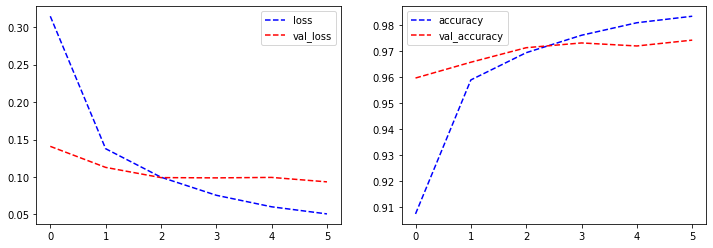

In [10]:
pl.figure(figsize = (12,4))
pl.subplot(1, 2, 1)

pl.plot(hstr.history['loss'], 'b--', label = 'loss')
pl.plot(hstr.history['val_loss'], 'r--', label = 'val_loss')
pl.legend()

pl.subplot(1, 2, 2)

pl.plot(hstr.history['accuracy'], 'b--', label = 'accuracy')
pl.plot(hstr.history['val_accuracy'], 'r--', label = 'val_accuracy')
pl.legend()

pl.show()

In [13]:
# CNN ( 합성곱 신경망 ) 모델

In [14]:
xtr = xtr.reshape((-1, 28, 28, 1))/255
xte = xte.reshape((-1, 28, 28, 1))/255

In [15]:
md = tf.keras.Sequential([
    
  tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
  tf.keras.layers.MaxPooling2D(strides = 2),
  tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
  tf.keras.layers.MaxPooling2D(strides = 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation = "relu"),
  tf.keras.layers.Dense(64, activation = "relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation = "softmax")

])

md.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hstr = md.fit(xtr, ytr, epochs = 10, validation_split = 0.2)
md.evaluate(xte, yte, verbose = 2)

Epoch 1/10
1500/1500 [==============================] - 13s 4ms/step - loss: 0.1788 - accuracy: 0.9442 - val_loss: 0.0711 - val_accuracy: 0.9796
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0572 - accuracy: 0.9829 - val_loss: 0.0413 - val_accuracy: 0.9885
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0384 - accuracy: 0.9883 - val_loss: 0.0400 - val_accuracy: 0.9890
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0430 - val_accuracy: 0.9882
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0608 - val_accuracy: 0.9831
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.0413 - val_accuracy: 0.9907
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0153 - accuracy: 0.9953 - val_loss: 0.0522 - val_accuracy

[0.03299408033490181, 0.9923999905586243]

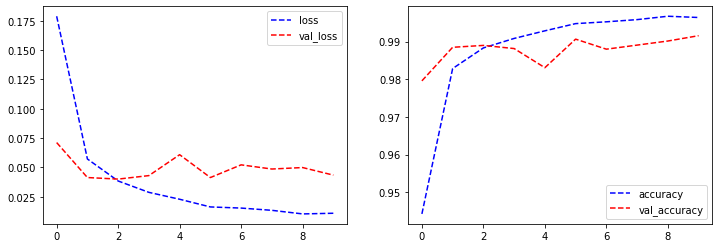

In [16]:
pl.figure(figsize = (12,4))
pl.subplot(1, 2, 1)

pl.plot(hstr.history['loss'], 'b--', label = 'loss')
pl.plot(hstr.history['val_loss'], 'r--', label = 'val_loss')
pl.legend()

pl.subplot(1, 2, 2)

pl.plot(hstr.history['accuracy'], 'b--', label = 'accuracy')
pl.plot(hstr.history['val_accuracy'], 'r--', label = 'val_accuracy')
pl.legend()

pl.show()